# PROYECTO TABARCA

(15 de Marzo de 2022)

## Introducción

**Analisis del efecto de la reserva marina de Tabarca**

En este jupyter, vamos a realizar el analisis de un estudio experimental, en el cual analizaremos el efecto de la AMP (Area Marina Protegida) de la isla de Tabarca.

Para ello, analizaremos el efecto de la distancia a la AMP a 3 niveles (Cerca, Medio y Lejos), así como, el efecto de la estacionalidad (Verano, Primavera e Invierno) en la abundancia, nº sp, biomasa, así como, de otras variables recogidas.

Por otra parte, en este estudio tenemos en cuenta la variabilidad aleatoria presente en la recogida de muestras, debido a esto, repetimos el muestreo 6 días para cada estación y para cada uno de estos días tomamos 6 muestras.

Se tomaron muestras mediante la red de trasmallo (3 mallas de 100m de longitud).

Cada dia 6 trasmallos.


### Txt or Excel File

En el archivo txt o excel vamos a encontrar 1º Factores y 2º Variables

Factores:
- **Distancia**: Cerca, Medio y Lejos
- **Epoca:** Verano, Primavera e Invierno
- **Día:** 1-6
- **Réplica:** 1-6

Variables:
- nsp: **nº de especies**
- abu: **abundancia**
- bio: **biomasa**
- spor: ***Scorpaena porcus***
- sumb: ***Sciaena umbra***
- lmer: ***Labrus merula***
- soff: ***Sepia officinalis***


<br>

## Hipotesis principal

- H0: Si existe un proceso de exportación (Se capturaría más en cerca)
- Ha: No existe ese proceso de exportación 

El factor principal es la **distancia** mientras que la variable principal es la **abundancia**.



### Hipotesis ANOVA 

- H0: Todas las medias son iguales | (B = ?)
- Ha: Al menos 1 es diferente | (alpha = 0.05)

### Tipos de Variabilidad

- Variabilidad **entre factores** (Diferencia entre las medias de los distintos niveles).
- Variabilidad **dentro de los niveles** (Diferencia debido a ala aleatoriedad).



Diferencia entre estas variabilidades:

    E --> Entre
    D --> Dentro
    
- E < D --> **NO efecto** del factor (<1)
- E = D --> **NO efecto** del factor (=1)
- E > D --> **PUEDE haber efecto** del factor (>1) 


### Todo ANOVA presenta un modelo lineal

Ej:. Solo con el factor distancia

**INTRODUCIMOS UNA IMAGEN EXPLICANDO EL MODELO DE ANOVA CON EL FACTOR DISTANCIA**

# Analisis estadístico con Python

## Importamos nuestras librerías


In [41]:
# To handle the data
import pandas as pd
import numpy as np
from scipy import stats

# To make visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


# Others
import warnings
warnings.filterwarnings("ignore")

# Matplotlib settings
plt.rcParams["figure.dpi"] = 100
sns.set_style("whitegrid")
# plt.style.use("default")


## Importamos nuestro dataset

In [42]:
df_tabarca = pd.read_csv("pescas_dataset.txt", sep="\t")

df_tabarca.head()

,distancia,epoca,dia,replica,nsp,abu,bio,spor,sumb,lmer,soff
0,lejos,invierno,1,1,7,17,4885.4,506.5,0.0,1258.6,729.1
1,lejos,invierno,1,2,8,12,1886.7,71.8,612.6,542.4,93.2
2,lejos,invierno,1,3,10,17,2283.1,71.8,0.0,384.4,467.0
3,lejos,invierno,1,4,9,15,2914.2,477.6,394.6,464.6,309.8
4,lejos,invierno,1,5,7,17,2905.8,179.6,137.6,1598.3,0.0


In [43]:
df_tabarca.tail()

,distancia,epoca,dia,replica,nsp,abu,bio,spor,sumb,lmer,soff
319,cerca,verano,6,2,5,10,1566.6,283.6,155.9,720.7,0.0
320,cerca,verano,6,3,5,10,1756.2,244.1,0.0,1292.4,0.0
321,cerca,verano,6,4,8,12,1481.8,120.5,0.0,380.4,0.0
322,cerca,verano,6,5,10,17,2418.5,375.5,184.3,593.6,0.0
323,cerca,verano,6,6,5,11,2025.2,485.0,0.0,1259.7,0.0


## Analizamos describiendo el dato

Nos encontramos con un dataset que contiene **324 registros**, correspondientes a cada una de las muestras que se tomaron para realizar este diseño experimental.

### ¿Contamos con todas las variables en nuestro dataset?

En este caso, contamos correctamente con los 4 factores y las 7 variables anteriormente mencionadas.

In [44]:
df_tabarca.shape

(324, 11)

In [45]:
print(df_tabarca.columns.values)

['distancia' 'epoca' 'dia' 'replica' 'nsp' 'abu' 'bio' 'spor' 'sumb'
 'lmer' 'soff']


### Ordenamos los niveles de Distancia

En este caso, vamos a realizar un preprocesamiento sencillo para ordenar los niveles de distancia y de epoca, de manera que queden ordenados en nuestro dataframe tal que:

- Distancia: **Cerca, Medio y Lejos.**
- Epoca: **Primavera, Verano e Invierno.**

Para ello, haremos uso de las siguientes funciones:
    
- **`.map():`** Para mapear y transformar los datos a traves de un diccionario.
- **`.replace():`** Realizaría la misma función que .map() salvo que pasamos los datos a traves de una lista
- **.`sort_values():`** Nos permite ordenar los valores del dataframe.
    
El objetivo es pasar los datos a un **formato numérico** asignandoles a cada uno el número que hace referencia a la posición por la que se ordenará en el dataset.



In [46]:
df_tabarca["distancia"] = df_tabarca["distancia"].map({"cerca": 1,
                                                        "medio": 2,
                                                        "lejos": 3})

df_tabarca["epoca"] = df_tabarca["epoca"].replace(["primavera", "verano", "invierno"],
                                                  [1, 2, 3])


df_tabarca.head()

,distancia,epoca,dia,replica,nsp,abu,bio,spor,sumb,lmer,soff
0,3,3,1,1,7,17,4885.4,506.5,0.0,1258.6,729.1
1,3,3,1,2,8,12,1886.7,71.8,612.6,542.4,93.2
2,3,3,1,3,10,17,2283.1,71.8,0.0,384.4,467.0
3,3,3,1,4,9,15,2914.2,477.6,394.6,464.6,309.8
4,3,3,1,5,7,17,2905.8,179.6,137.6,1598.3,0.0


#### Una vez transformados los datos.

Aplicamos el sort_values, ordenando los valores de menor a mayor.

In [47]:
df_tabarca = df_tabarca.sort_values(["distancia", "epoca"], axis=0,
                                    ascending=[True, True])

df_tabarca.head()

,distancia,epoca,dia,replica,nsp,abu,bio,spor,sumb,lmer,soff
252,1,1,1,1,3,5,859.9,71.8,0.0,431.6,0.0
253,1,1,1,2,2,3,805.3,0.0,0.0,0.0,0.0
254,1,1,1,3,4,5,1801.5,102.4,607.7,0.0,513.6
255,1,1,1,4,3,3,546.6,140.7,0.0,318.9,0.0
256,1,1,1,5,3,7,1569.0,0.0,0.0,475.4,755.4


In [48]:
df_tabarca.tail()

,distancia,epoca,dia,replica,nsp,abu,bio,spor,sumb,lmer,soff
31,3,3,6,2,6,24,5857.6,300.7,0.0,286.3,0.0
32,3,3,6,3,7,14,3898.0,508.5,0.0,0.0,683.6
33,3,3,6,4,13,22,4926.9,456.4,0.0,0.0,574.9
34,3,3,6,5,9,11,4374.1,243.1,0.0,0.0,737.8
35,3,3,6,6,4,6,1297.2,0.0,0.0,0.0,309.8


#### Una vez reordenado los datos.

Repetimos el proceso de transformación de los datos.

Podemos realizar este proceso con cualquiera de las dos funciones `.map()` y `.replace()`.

En este caso, uso tanto la función .map() como .replace() puesto que en Python muchas veces existe **más de un camino** para realizar un mismo proceso.


In [49]:
df_tabarca["distancia"] = df_tabarca["distancia"].map({1: "C",
                                                        2: "M",
                                                        3: "L"})



df_tabarca["epoca"] = df_tabarca["epoca"].replace([1, 2, 3],
                                                  ["PRI", "VER", "INV"])

df_tabarca.head()

,distancia,epoca,dia,replica,nsp,abu,bio,spor,sumb,lmer,soff
252,C,PRI,1,1,3,5,859.9,71.8,0.0,431.6,0.0
253,C,PRI,1,2,2,3,805.3,0.0,0.0,0.0,0.0
254,C,PRI,1,3,4,5,1801.5,102.4,607.7,0.0,513.6
255,C,PRI,1,4,3,3,546.6,140.7,0.0,318.9,0.0
256,C,PRI,1,5,3,7,1569.0,0.0,0.0,475.4,755.4


### ¿Como reseteo el índice?

Una vez, modificados los datos de posición gracias a la función `.sort_values()`.

Encontramos que el índice de nuestro dataframe continua considerando a cada valor segun la posición que mantenia anteriormente.

Por lo que, para resetear el índice una vez ordenado nuestro dataset utilizaremos la función `.reset_index().`

In [50]:
df_tabarca = df_tabarca.reset_index(drop=True)

df_tabarca.head()

,distancia,epoca,dia,replica,nsp,abu,bio,spor,sumb,lmer,soff
0,C,PRI,1,1,3,5,859.9,71.8,0.0,431.6,0.0
1,C,PRI,1,2,2,3,805.3,0.0,0.0,0.0,0.0
2,C,PRI,1,3,4,5,1801.5,102.4,607.7,0.0,513.6
3,C,PRI,1,4,3,3,546.6,140.7,0.0,318.9,0.0
4,C,PRI,1,5,3,7,1569.0,0.0,0.0,475.4,755.4


### ¿Como guardamos el dataset  ordenado?

En el caso de que queramos guardar el dataset modificado podemos utilizar varias funciones para guardarlo en un formato u otro.

Entre estas funciones, destaco:

- .`to_excel()`: Para convertir en un archivo de **excel** (xls o xlsx).
- `.to_csv()`: Para convertirlo en un **csv** (*comma separated values*) o en un **txt**.



In [51]:
# df_tabarca.to_excel("pescas_dataset.xlsx", index=False)
# df_tabarca.to_csv("pescas_dataset.txt", sep = "\t", index=False)

# Visualización de datos con Python

Al comenzar un estudio analítico, siempre hay que realizar un par de graficos puesto que es la mejor manera de entender como estan distribuidos nuestros datos.

## Librerias para visualización de datos.

Las librerias para visualización del dato que vamos a utilizar son: **matplotlib y seaborn.**


En este caso, vamos a comenzar gráficando **la variable y el factor principal** de estudio.


## Pasamos a graficar

Abundancia es una variable continua.

Un par de gráficos que nos ofrecen mucha información acerca de su distribución,
así como, de sus estadisticos básicos son el `.boxplot()` o el `.Violinplot()`.

Con la libreria seaborn ambos son muy **faciles de usar** y **apenas hay diferencias**
en su código.

Dicho esto, **¡pasamos a gráficar!**

#### Graficamos la variable principal

- Como podemos observar, sigue una distribución normal
- Vemos una ligera cola hacia la derecha de la distribución, posibles outliers.

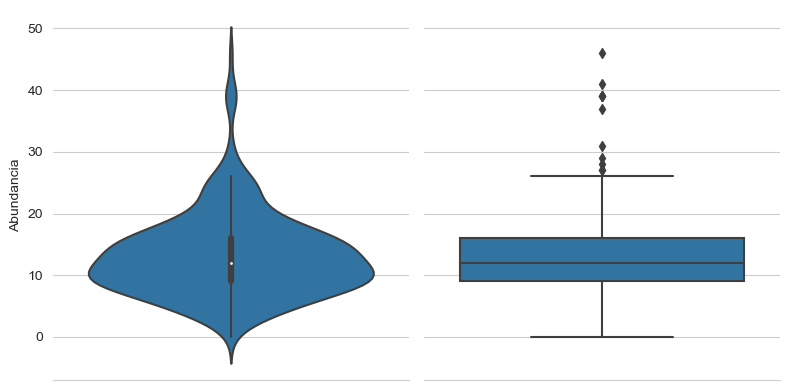

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True ,figsize=(8,4))


sns.violinplot(data= df_tabarca,
               y = "abu",
               inner= "box",
               ax= ax[0])

ax[0].set(xlabel= "", ylabel= "Abundancia")
sns.despine()

sns.boxplot(data= df_tabarca,
               y = "abu",
               ax= ax[1])

ax[1].set(xlabel= "", ylabel= "")
sns.despine(left=True)

fig.tight_layout()
fig.show()


### Boxplot o diagrama de cajas

El diagrama de cajas o boxplot nos permite conocer los estadísticos básicos (cuartiles, mediana, outliers...) de la distribución de una variable.

> Por lo que, resultan muy útiles a la hora de gráficas variables continuas con varias categorias (caso de distancia y/o epoca).



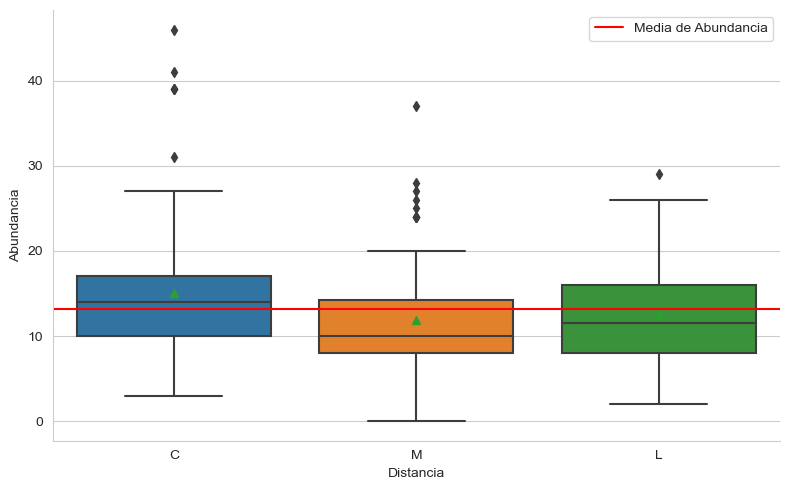

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))

ax = sns.boxplot(data= df_tabarca,
                  x = "distancia",
                  y = "abu",
                  showmeans=True)

ax.set(xlabel= "Distancia", ylabel= "Abundancia")

ax.axhline(y= df_tabarca["abu"].mean(), 
            color= "r",
            linestyle= "-",
            label= "Media de Abundancia")

ax.legend()
sns.despine()

fig.tight_layout()
fig.show()

### Violinplot

Esta gráfica es muy útil, ya que nos permite **observar la distribución** que sigue la variable abundancia para **cada categoria** de un determinado **factor**.

En este caso, podemos observar como mayormente las variables siguen una **distribución normal** o al menos, no difieren demasiado de lo que sería una distribución normal. Aunque, en el caso de **Cerca y Lejos** con una **ligera cola** hacia la parte derecha de la distribución.

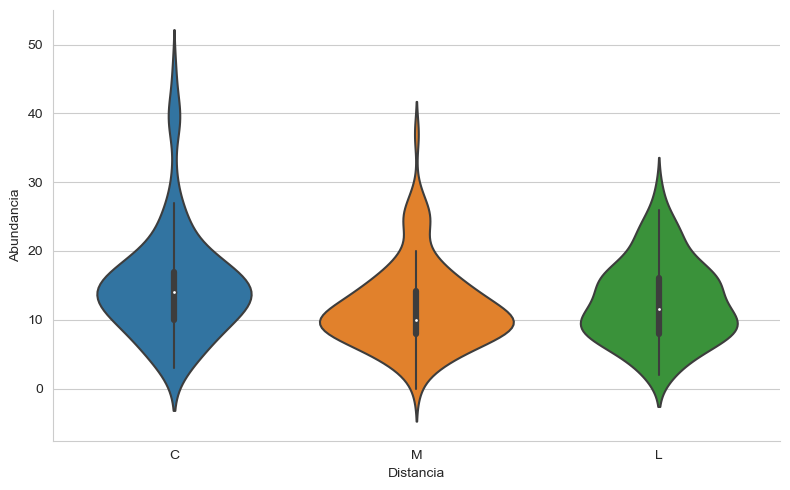

In [54]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))


ax = sns.violinplot(data= df_tabarca,
                    x = "distancia",
                    y = "abu",
                    inner= "box")



ax.set(xlabel= "Distancia", ylabel= "Abundancia")
sns.despine()

fig.tight_layout()
fig.show()




## Efecto del proceso de exportación de la Reserva de Tabarca

- Se observa un ligero **efecto positivo** en el valor de abundancia **de Cerca respecto a Medio y Lejos.**
- La variable abundancia sigue una distibución  normal para cada uno de los niveles del factor distancia.

## Interacción entre factores

Puede ocurrir que un factor **influya en otro.**


[Imagen] AÑADIR IMAGEN GRÁFICA DE LA INTERACCIÓN.

Siempre hay que comprobar **si existe interacción entre los factores.**

Esto lo podemos observar visualmente gráficando los datos de:

- Variable principal: **Abundancia.**
- Factores: **Epoca y Distancia.**

### Gráficamos 2 o más factores

Para ello, vamos a emplear la función `.catplot()` de seaborn, muy útil para graficar **variables categóricas.**

Podemos observar:

- Para cerca y medio, la abundancia sigue tal que: **INV > VER > PRI.**

- Con respecto a lejos, **PRI > INV > VER**.

- Los 3 mayores valores de abundancia fueron: **INV(C), INV(M) y PRI(L).**


Podemos afirmar, que **existe interacción** en el modelo **entre Distancia y Epoca.**

Por ende, tendremos que **incluirla en el modelo.**


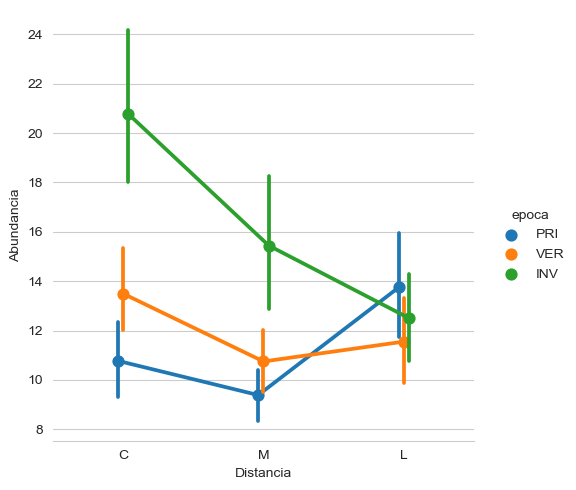

In [55]:
g = sns.catplot(data= df_tabarca,
                x= "distancia",
                y= "abu",
                hue= "epoca",
                kind= "point",
                dodge= True,
                join= True
                )

g.set(xlabel= "Distancia", ylabel= "Abundancia")
sns.despine(left=True)

g.tight_layout()


# ANOVA

## Requisitos

- **Independencia de los datos**

Nuestros datos son independientes y aleatorios


- **Normalidad de los datos**

Los datos de cada nivel deben seguir una distribución normal.


Para comprobar la normalidad realizamos un test de normalidad K-S o Kolgomorov-Smirnov.

- H0: The data are normally distributed
- Ha: The data are not normal distribuited

Sí las muestras no siguen una distribución normal, no es necesario transformar los datos, ya que en este caso, contamos con **más de 30 muestras y datos balanceados** (mismo nº samples por nivel). Por lo que el ANOVA es **suficientemente robusto.**


- **Homogeneidad de las varianzas**





## Normalidad de los datos

### Tests de normalidad

Vamos a comprobar la normalidad usando varios tests como el de Shapiro-Wilk test o el test de Kolgomorov-Smirnov que emplee en la realización de este script.

- Test de Shapiro-Wilk (recomendable).
- Test de Kolgomorov-Smirnov (K-S).

En este caso, observamos:

- Ninguno de los subconjuntos (C, M y L) presento un pvalor > 0,05 para el K-S test.
- Tampoco sucedio al realizar el test de Shapiro-Wilk (pvalor < 0,05).

In [56]:
# Creamos subconjuntos de datos de Abundancia para cada nivel de distancia
#===========================================================================

cerca = df_tabarca[df_tabarca["distancia"] == "C"]["abu"]
medio = df_tabarca[df_tabarca["distancia"] == "M"]["abu"]
lejos = df_tabarca[df_tabarca["distancia"] == "L"]["abu"]


print(cerca.shape, medio.shape, lejos.shape)


(108,) (108,) (108,)


In [57]:
print("\nK-S test:\n")

_, pval = stats.kstest(cerca, "norm")
print("P-value: {:.2}".format(pval))

_, pval = stats.kstest(medio, "norm")
print("P-value: {:.2}".format(pval))

_, pval = stats.kstest(lejos, "norm")
print("P-value: {:.2}".format(pval))



print("\nShapiro-Wilk Test:\n")

_, pval = stats.shapiro(cerca)
print("P-value: {:.4}".format(pval))

_, pval = stats.shapiro(medio)
print("P-value: {:.4}".format(pval))

_, pval = stats.shapiro(lejos)
print("P-value: {:.4}".format(pval))


K-S test:

P-value: 2.4e-310
P-value: 1.2e-213
P-value: 7.2e-178

Shapiro-Wilk Test:

P-value: 2.308e-08
P-value: 2.071e-06
P-value: 0.02839


### Método visual

Otra forma de comprobar la normalidad de los datos es a traves de gráficas.

En este caso, vamos a emplear dos muy utilizadas para observar la distribución de una variable continua.

#### Histogramas

- Observamos un sesgo positivo tanto para la distribución de Cerca como de Medio.
- Con respecto a Lejos, se observa un comportamiento que se asemejaría más a una dist. normal.


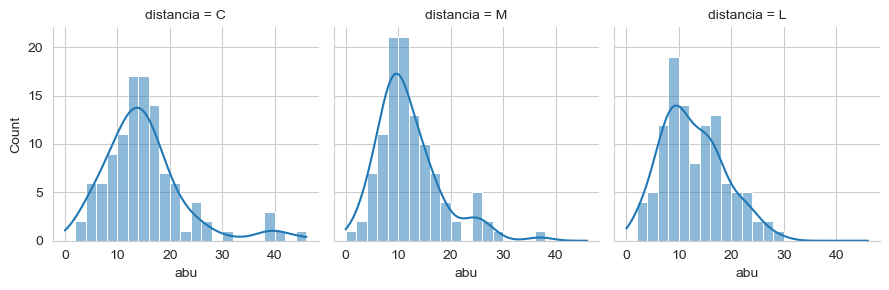

In [58]:
ax = sns.displot(data= df_tabarca,
            x="abu",
            col="distancia",
            kde= True,
            height= 3,
            aspect= 1,
            facet_kws=dict(margin_titles=True))

ax.tight_layout()

#### Q-Q plot

- Observamos como los valores extremadamente altos tienen una gran influencia en la distribucin de C y M.
- Al igual que en la anterior gráfica, el grupo L (Lejos) muestra un menor sesgo positivo.


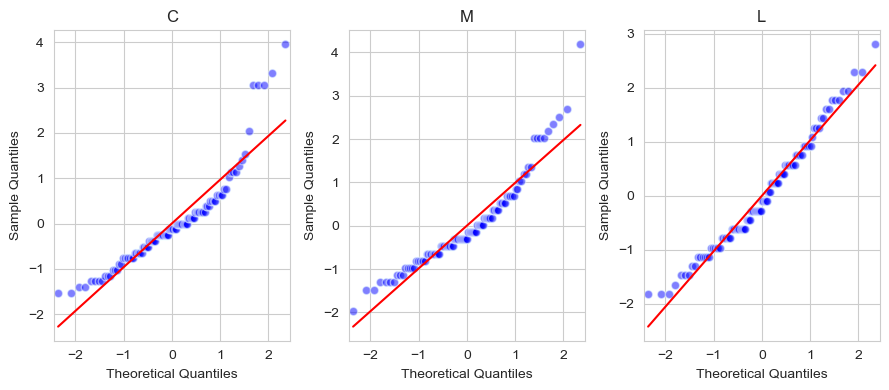

In [83]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,4))

sm.qqplot(data=cerca,
          fit=True,
          line="r",
          ax=axes[0],
          color="azure",
          alpha=0.5,
          lw=2)

sm.qqplot(data=medio,
          fit=True,
          line="r",
          ax=axes[1],
          color="azure",
          alpha=0.5,
          lw=2)

sm.qqplot(data=lejos,
          fit=True,
          line="r",
          ax=axes[2],
          color="azure",
          alpha=0.5,
          lw=2)


axes[0].set_title("C")
axes[1].set_title("M")
axes[2].set_title("L")

# fig.suptitle("Q-Q Plots", fontsize=14, fontweight="bold", y=0.95, x=0.53, ha="center")
fig.tight_layout()



## Homogeneidad de varianzas

### Tests de homogeneidad

Vamos a comprobar la homogeneidad usando varios tests como el de

Shapiro-Wilk test o el test de Kolgomorov-Smirnov que emplee en la realización de este script.

- Test de Bartlett.

Siendo el contraste de hipótesis:

H0:
Ha:


In [85]:
print("\nBarlett test\n")


_, pval = stats.bartlett(cerca, medio, lejos)
print("P-value: {:.4}".format(pval))


Barlett test

P-value: 0.002739


In [ ]:
# _, pval = stats.bartlett(np.sqrt(cerca+1),
#                           np.sqrt(medio+1),
#                           np.sqrt(lejos+1)
#                           )

# print("P-value: {:.4}".format(pval))

# _, pval = stats.bartlett(np.log(cerca+1),
#                           np.log(medio+1),
#                           np.log(lejos+1)
#                           )

# print("P-value: {:.4}".format(pval))

#### Metodo visual

In [60]:
# sm.qqplot(est.resid, line="s") # 45, q, r
# plt.show()